In [1265]:
import pandas as pd
from scipy.stats import norm, skew
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from collections import Counter
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


In [1266]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [1267]:
'''
We collected this data from kaggel with this link:
https://www.kaggle.com/datasets/gagandeep16/car-sales/code
this is a relatively small datset and may not be a large enough sample to represent the population and making correct inference.
However We will correct the sample in a way that it will represent the population in someway. With the intention of making a model that has
the accuracy > 0.6. Using the metrics of R2

'''

'\nWe collected this data from kaggel with this link:\nhttps://www.kaggle.com/datasets/gagandeep16/car-sales/code\nthis is a relatively small datset and may not be a large enough sample to represent the population and making correct inference.\nHowever We will correct the sample in a way that it will represent the population in someway. With the intention of making a model that has\nthe accuracy > 0.6. Using the metrics of R2\n\n'

In [1268]:
# Load the dataset
df = pd.read_csv("Car_sales.csv")

In [1269]:
# Initial info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [1270]:
# EDA
# Checking the first few rows of the dataset
df.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [1271]:
# Checking unique values
print(df.shape)
cols = df.columns
for col in cols:
    print(f"{col}:",len(df[col].unique()))

(157, 16)
Manufacturer: 30
Model: 156
Sales_in_thousands: 157
__year_resale_value: 118
Vehicle_type: 2
Price_in_thousands: 153
Engine_size: 32
Horsepower: 67
Wheelbase: 89
Width: 79
Length: 128
Curb_weight: 148
Fuel_capacity: 56
Fuel_efficiency: 21
Latest_Launch: 130
Power_perf_factor: 155


In [1272]:
# Checking null value.
np.round(df.isnull().mean() * 100,1)

Manufacturer            0.0
Model                   0.0
Sales_in_thousands      0.0
__year_resale_value    22.9
Vehicle_type            0.0
Price_in_thousands      1.3
Engine_size             0.6
Horsepower              0.6
Wheelbase               0.6
Width                   0.6
Length                  0.6
Curb_weight             1.3
Fuel_capacity           0.6
Fuel_efficiency         1.9
Latest_Launch           0.0
Power_perf_factor       1.3
dtype: float64

<Axes: >

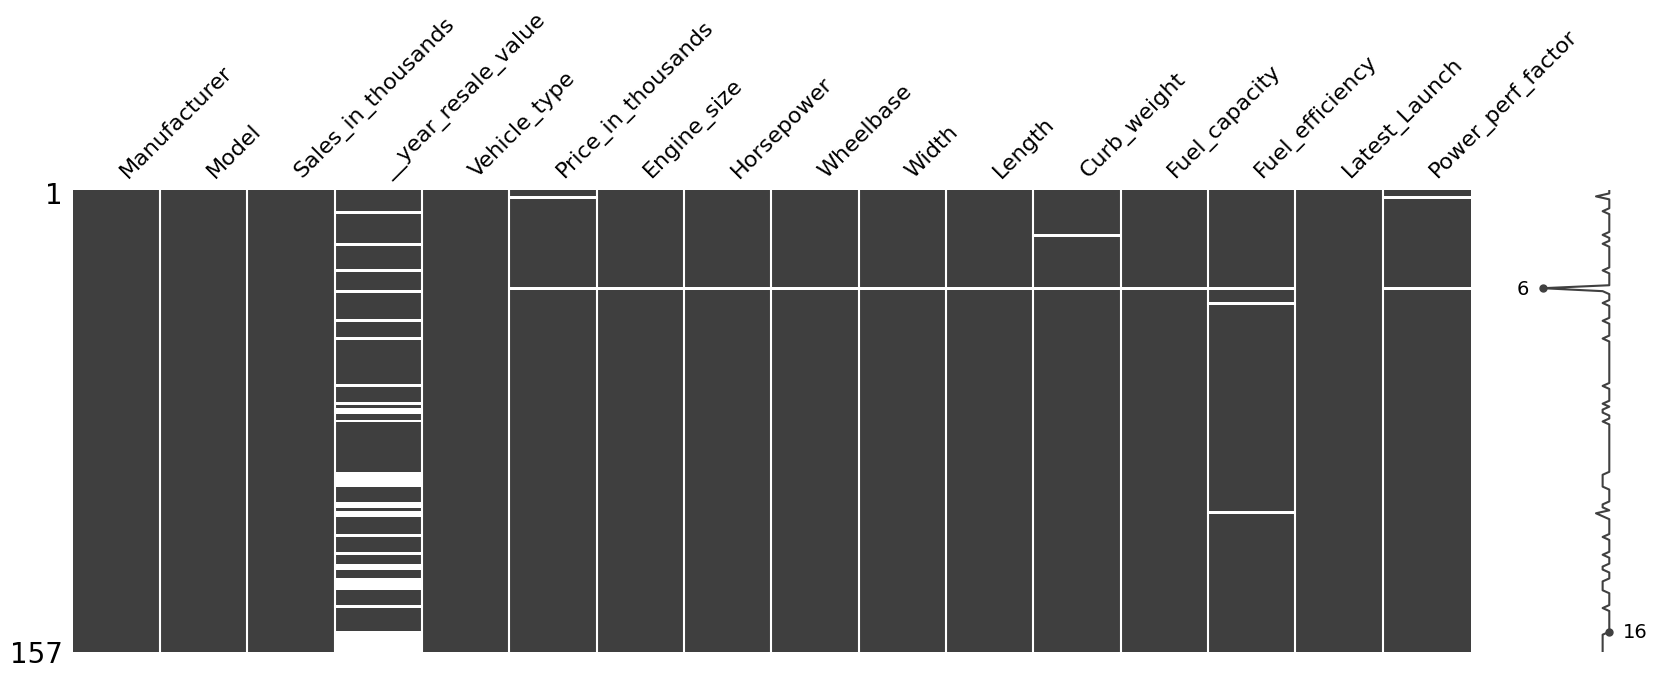

In [1273]:
msno.matrix(df, figsize=(20, 6))

In [1274]:
# Simple imputation for the data
# Perform median imputation for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('Sales_in_thousands')
print(numeric_cols)

df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Perform mode imputation for object columns
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Display the result
np.round(df.isnull().mean() * 100,1)

Index(['__year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')


Manufacturer           0.0
Model                  0.0
Sales_in_thousands     0.0
__year_resale_value    0.0
Vehicle_type           0.0
Price_in_thousands     0.0
Engine_size            0.0
Horsepower             0.0
Wheelbase              0.0
Width                  0.0
Length                 0.0
Curb_weight            0.0
Fuel_capacity          0.0
Fuel_efficiency        0.0
Latest_Launch          0.0
Power_perf_factor      0.0
dtype: float64

In [1275]:
# Select only numerical columns and full rows

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Create a copy for distribution visualizing
df_dis = df

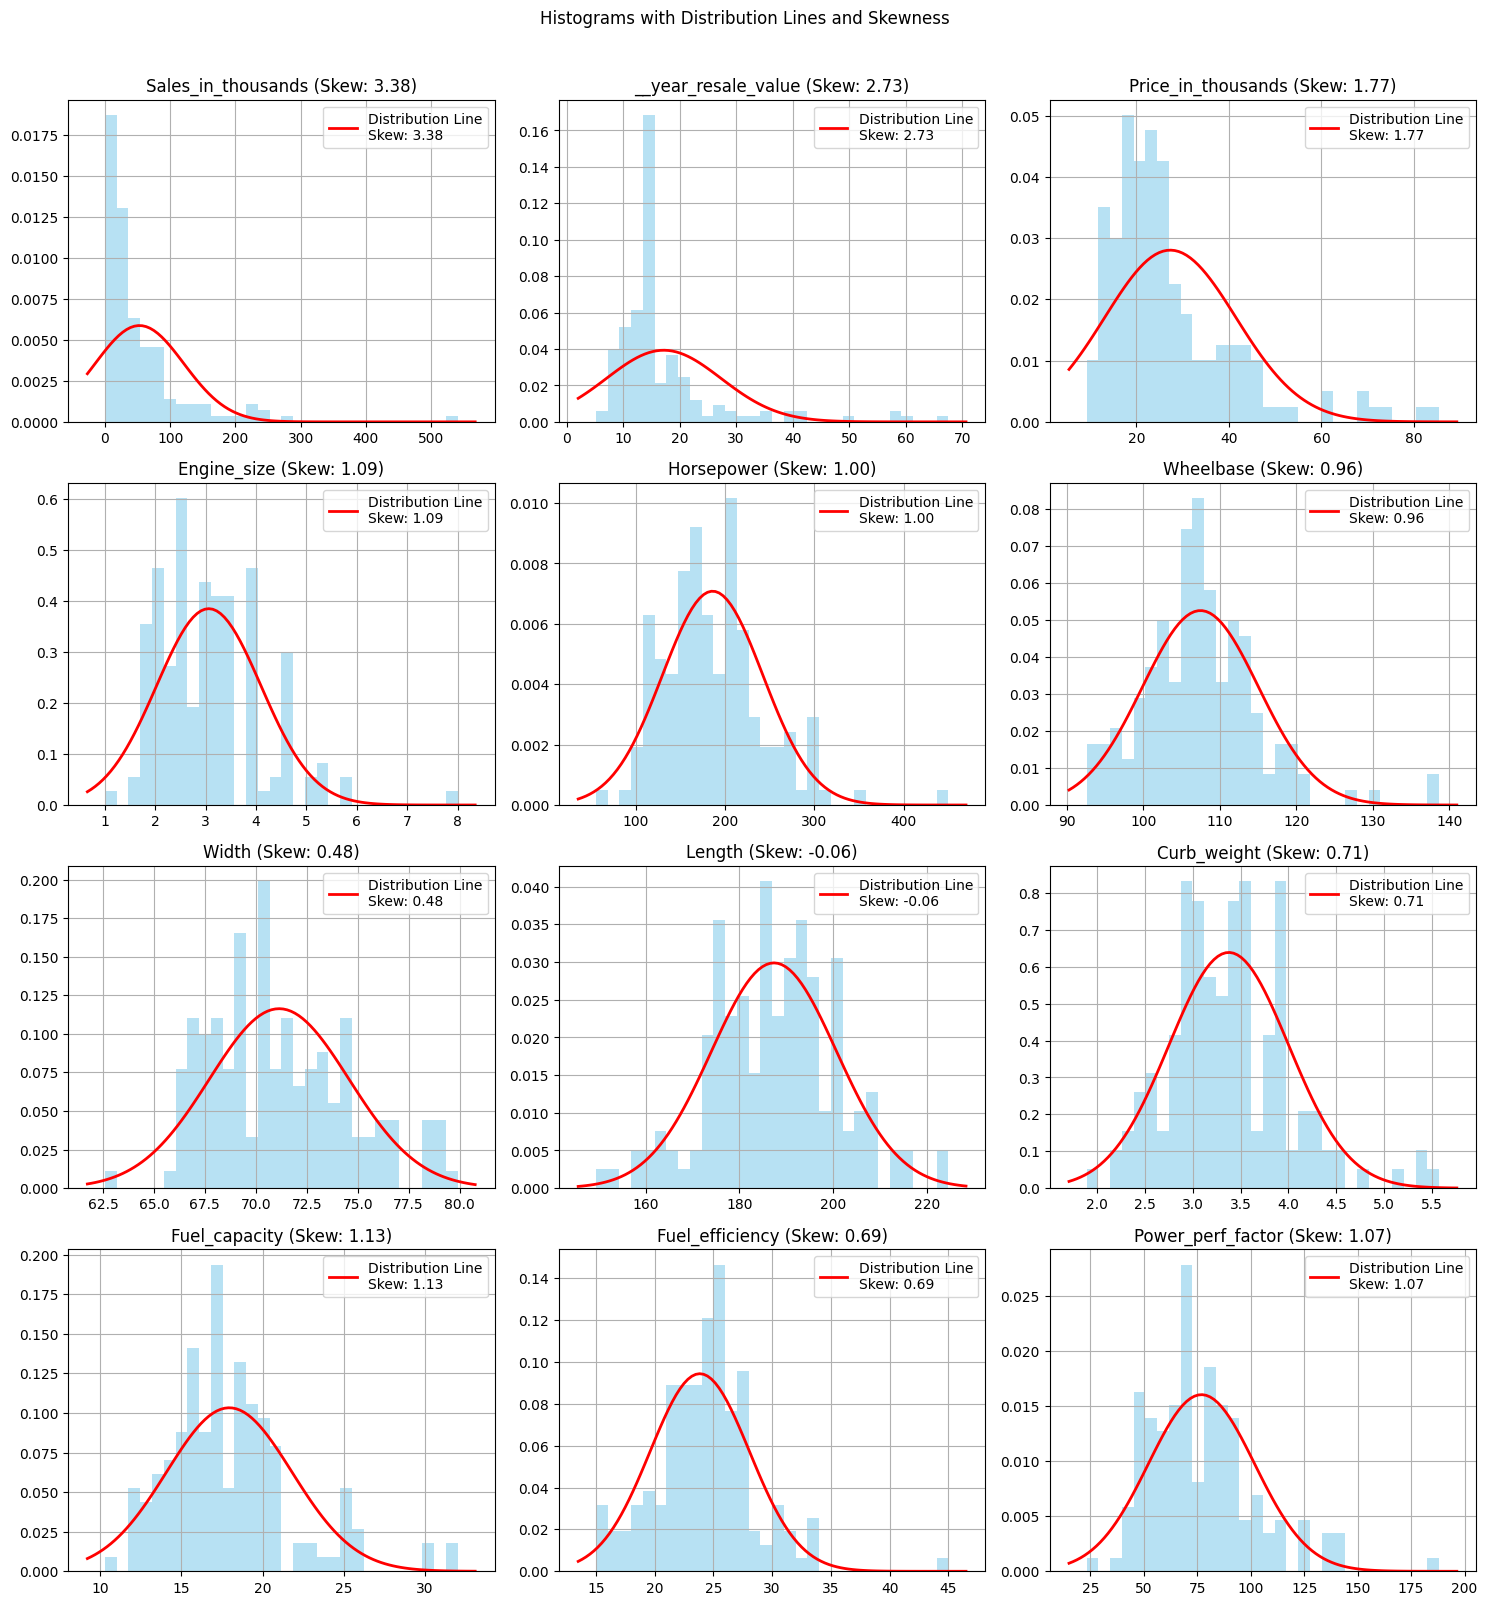

In [1276]:
# Checking distribution 

# Create histograms with distribution lines
fig, axes = plt.subplots(len(numeric_cols) // 3 + 1, 3, figsize=(15, 20))
axes = axes.flatten()

for col, ax in zip(numeric_cols, axes):
    # Plot histogram
    df_dis[col].hist(bins=30, density=True, alpha=0.6, color='skyblue', ax=ax)
    
    # Fit normal distribution
    mean, std = norm.fit(df_dis[col])
    
    # Generate distribution line
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    ax.plot(x, p, 'r', linewidth=2)

    # Calculate skewness
    skew_val = skew(df_dis[col].dropna())
    
    # Update title and legend
    ax.set_title(f'{col} (Skew: {skew_val:.2f})')
    ax.legend([f'Distribution Line\nSkew: {skew_val:.2f}'], loc='upper right')

# Remove unused axes
for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.suptitle('Histograms with Distribution Lines and Skewness')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [1277]:
print(df_dis.shape)

(157, 16)


In [1278]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [1279]:
df_corr = df.drop([
    'Manufacturer', 'Model','Vehicle_type','Latest_Launch'
], axis = 1)

<Axes: >

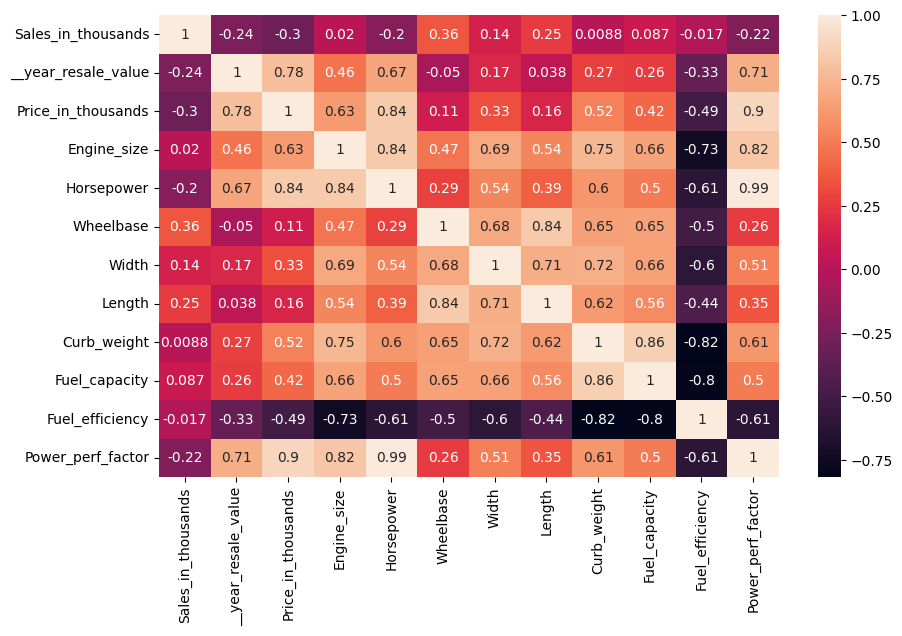

In [1280]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot = True, )

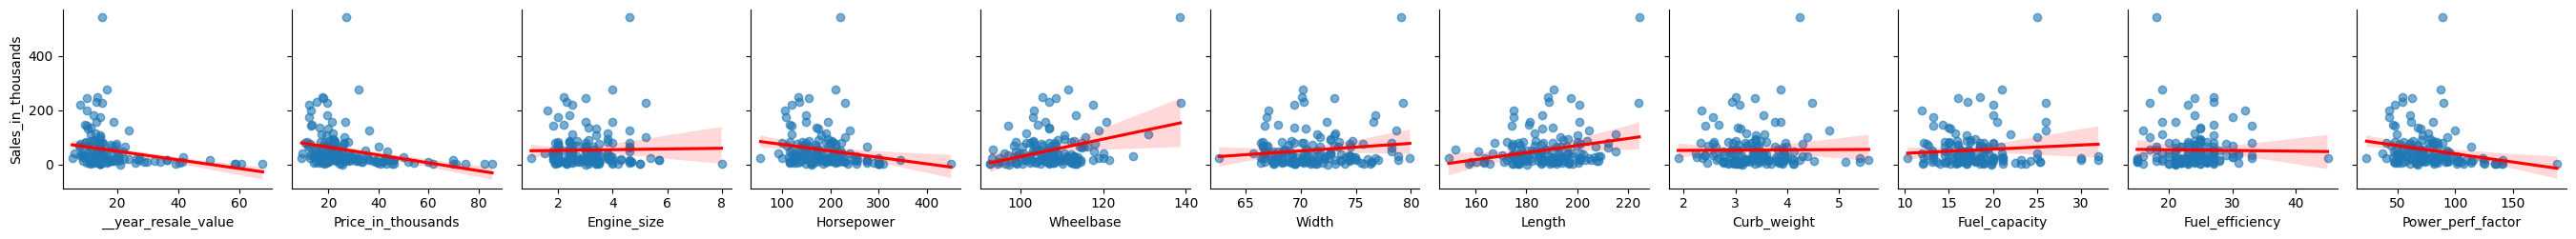

In [1281]:
# Correlation with the categorical data of vehicle type
# Select only numerical columns
numeric_df = df_dis.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numeric_df, x_vars=numeric_df.columns.drop('Sales_in_thousands'), y_vars='Sales_in_thousands',
             kind='reg', 
             plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.6}})
plt.show()

In [1282]:
# Base on the correlation we see that Engize size, Curb_weight, and Fuel efficiency has little correlation with our data
# Therefore we dicide to drop the columns entirely to increase the accuracy of the model.
# We also drop the categorical columns of Manufacturer and Mode as one hot encoding would overload the linear regresion model with too many dims
'''
From the our EDA proccess:
Based on the correlation We see that Engize size, Curb_weight, and Fuel efficiency has little correlation with our data and will negetively
affect the accuracy of dataset therefore we decide to drop all of these columns entierly.

All of the other columns have significant correlation, however, the data is slightly skewd all will need some data proccessing later on
Another thing to consider is that multil-inearality may appear as the correlation among features such as: fuel efficiency, fuel capacity and engine size.

'''
df_after = df.drop(['Engine_size','Curb_weight','Fuel_efficiency', 'Model','Manufacturer','Latest_Launch']
            , axis = 1)

In [1283]:
df_new = df_after.drop('Vehicle_type', axis=1)

In [1284]:
df_new.head(10)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Horsepower,Wheelbase,Width,Length,Fuel_capacity,Power_perf_factor
0,16.919,16.360,21.500,140.0,101.2,67.3,172.4,13.2,58.280150
1,39.384,19.875,28.400,225.0,108.1,70.3,192.9,17.2,91.370778
2,14.114,18.225,22.799,225.0,106.9,70.6,192.0,17.2,72.030917
3,8.588,29.725,42.000,210.0,114.6,71.4,196.6,18.0,91.389779
4,20.397,22.255,23.990,150.0,102.6,68.2,178.0,16.4,62.777639
5,18.780,23.555,33.950,200.0,108.7,76.1,192.0,18.5,84.565105
6,1.380,39.000,62.000,310.0,113.0,74.0,198.2,23.7,134.656858
7,19.747,14.180,26.990,170.0,107.3,68.4,176.0,16.6,71.191207
8,9.231,28.675,33.400,193.0,107.3,68.5,176.0,16.6,81.877069
9,17.527,36.125,38.900,193.0,111.4,70.9,188.0,18.5,83.998724


In [1285]:
X = df_new.drop('Sales_in_thousands', axis = 1)
print(X.shape)
y = df_new['Sales_in_thousands']
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
print(X.shape)
print(y.shape)

(157, 8)
(157, 8)
(157,)


In [1286]:
# Splitting X and Y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 42 ,shuffle = True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(125, 8)
(125,)
(32, 8)
(32,)


In [1287]:
y_train.head(10)
X_train.head(10)

,__year_resale_value,Price_in_thousands,Horsepower,Wheelbase,Width,Length,Fuel_capacity,Power_perf_factor
136,10.025,13.108,120.0,97.0,66.7,174.0,13.2,47.968972
55,7.850,12.050,119.0,117.5,69.4,200.7,20.0,47.389531
124,41.250,41.430,217.0,95.2,70.1,171.0,17.0,93.437331
84,19.125,31.807,200.0,107.3,69.9,186.6,24.3,83.920815
105,17.810,29.299,170.0,106.3,71.7,182.6,21.0,72.290355
42,13.425,18.575,175.0,127.2,78.8,208.5,32.0,70.078322
67,13.475,14.460,120.0,93.4,66.7,152.0,19.0,48.672898
127,14.180,33.120,170.0,106.4,70.6,189.2,18.5,73.503778
26,5.160,9.235,55.0,93.1,62.6,149.4,10.3,23.276272
135,14.180,20.095,165.0,99.4,68.3,175.2,15.9,66.762943


In [1288]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)
# This is a bad score and the data will need preproccessing

0.22791573329103942

In [1289]:
# Perform box cox transformation for every used column chang them into normal distribution

df_new.clip(lower=0.1, inplace=True)
for column in df_new.columns:
    df_new[column], _ = stats.boxcox(df_new[column])

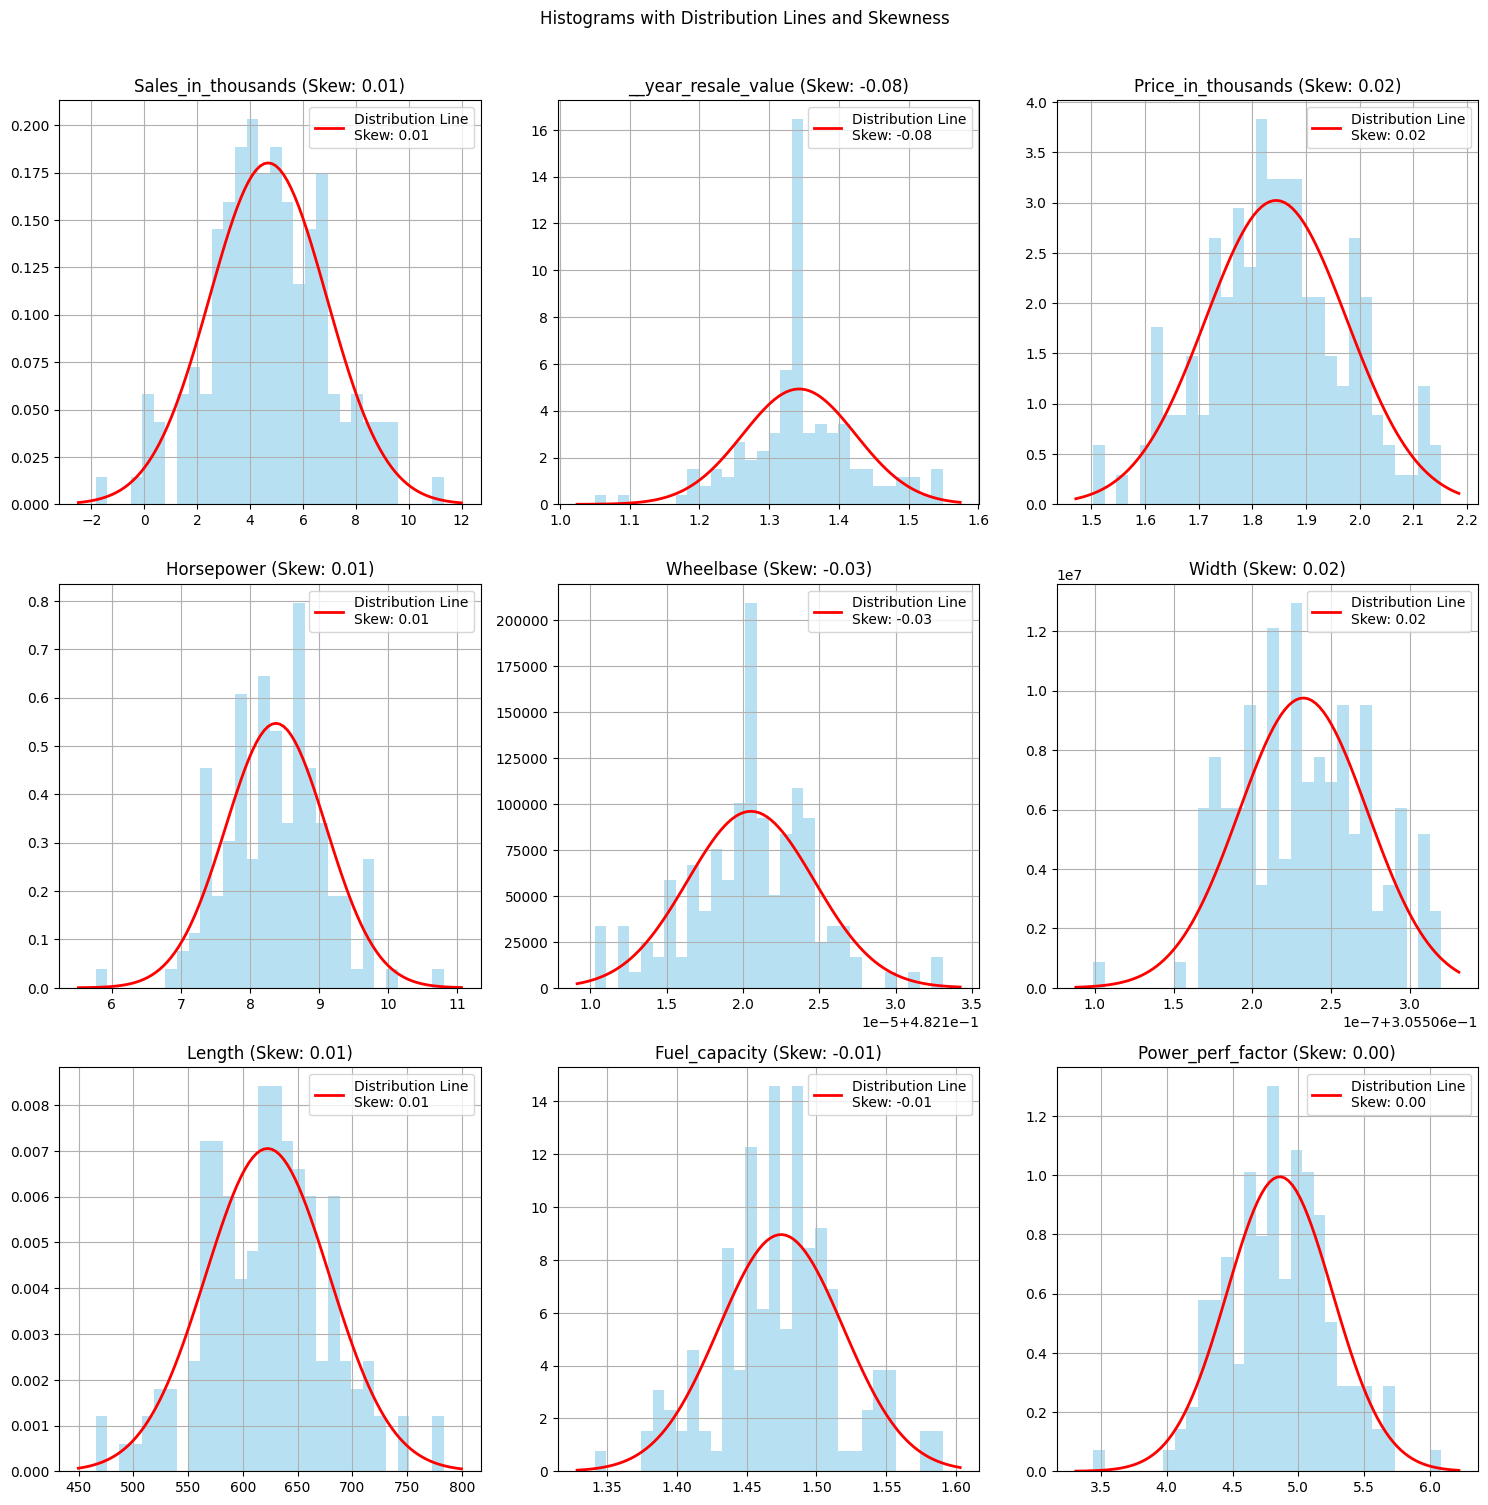

In [1290]:
# Cheking distribution again:
# Checking distribution 
numeric_cols = df_new.columns
# Create histograms with distribution lines
fig, axes = plt.subplots(len(numeric_cols) // 3 + 1, 3, figsize=(15, 20))
axes = axes.flatten()

for col, ax in zip(numeric_cols, axes):
    # Plot histogram
    df_new[col].hist(bins=30, density=True, alpha=0.6, color='skyblue', ax=ax)
    
    # Fit normal distribution
    mean, std = norm.fit(df_new[col])
    
    # Generate distribution line
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    ax.plot(x, p, 'r', linewidth=2)

    # Calculate skewness
    skew_val = skew(df_new[col])
    
    # Update title and legend
    ax.set_title(f'{col} (Skew: {skew_val:.2f})')
    ax.legend([f'Distribution Line\nSkew: {skew_val:.2f}'], loc='upper right')

# Remove unused axes
for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.suptitle('Histograms with Distribution Lines and Skewness')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [1291]:
X = df_new.drop('Sales_in_thousands', axis = 1)
print(X.shape)
y = df_new['Sales_in_thousands']
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
# Splitting X and Y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 42, shuffle = True)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

(157, 8)


0.5001564831079934

In [1292]:

# We have significantly improve our model just from setting all features to be in normal distribution

In [1293]:
# Scaing the data with Robust scaler
scaler = RobustScaler()
minmax = MinMaxScaler()


In [1294]:
# Splitting X and Y
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2,random_state = 42, shuffle = True)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)
# The proccess does not improve our model by a considerable margin meaning that our data is relatively balanced in terms of scaling

0.5001564831079934

In [1295]:
# Possible multicollinearity and onehon
# if our independents feaures correlate with each other, those are not really independent anymore and each weight can reflect falsely the impact on our
# target variable
'''
Looking back at our training data we see that there may exist some multicolinearity: as in the heatmap the correlation between fuel capacity, wheel-base
power_perfactor are worth to be consider. In fuel capcity, despite having hight correlation with others features, the correlation of it and the target
is low in comparision.

Thus, We decide to drop the fuel-capacity as we consider it as a disrubting feature to our model.
This align with our intuition as fule capacity usually increase as the power of the cars also increase
However it does not mean that expensive car will have higher fule capacity than others. I/e: cars vs trucs
'''

df_new = df_new.drop(['Fuel_capacity'],axis=1 )

In [1296]:
X = df_new1.drop('Sales_in_thousands', axis = 1)
print(X.shape)
y = df_new1['Sales_in_thousands']
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
# Splitting X and Y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 42, shuffle = True)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)
# On the contrary this actually decrease the accuracy of our model, meaning that out intuition was wrong.

(157, 3)


0.3080182764860272

In [1297]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,72.030917
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,14.180,Passenger,24.400,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,14.180,Passenger,27.500,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,14.180,Passenger,28.800,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,14.180,Passenger,45.500,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [1298]:
# We will try to encode data to see the model performs better
add1 = pd.get_dummies(df['Manufacturer'])

In [1299]:
df_new = pd.concat([df_new, add1], axis = 1)

In [1300]:
X = df_new.drop('Sales_in_thousands', axis = 1)
print(X.shape)
y = df_new['Sales_in_thousands']
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
# Splitting X and Y
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state = 42, shuffle = True)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

(157, 37)


0.572222384282713